In [117]:
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

from pymongo import MongoClient
import pprint

import pandas as pd

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import json
import time


chrome_driver_path = "/Users/annebarry/galvanize/running_rivalries/chromedriver"

driver = webdriver.Chrome(executable_path = chrome_driver_path)


driver.get('https://results.nyrr.org/event/M2019/finishers#g=F&page=1&af=25&at=29')

In [118]:
import matplotlib.pyplot as plt

In [ ]:
soup = BeautifulSoup(data, 'html.parser')

In [ ]:
print(soup.prettify())

In [ ]:
winner = soup.findAll("div", 'rms-grid-item')[0]
print(winner)

In [ ]:
winner.findAll("span", "long-text")[0].text[4:]

age = []
time = []
name = []

for i, result in enumerate(soup.findAll("div",'rms-grid-item')):
    time.append(result.findAll("span", "long-text")[0].text[4:])
    age.append(int(result.findAll("span", "ng-binding ng-scope")[0].text[1:]))
    name.append(result.findAll('div', 'name rms-grid-line ng-binding')[0].text)
    
print(time)
print(age)
print(name)

In [ ]:
def parse_results(soup, distance):
    age = []
    time = []
    name = []

    for i, result in enumerate(soup.findAll("div",'rms-grid-item')):
        time.append(result.findAll("span", "long-text")[0].text[4:])
        age.append(int(result.findAll("span", "ng-binding ng-scope")[0].text[1:]))
        name.append(result.findAll('div', 'name rms-grid-line ng-binding')[0].text.strip())
    dataframe = pd.DataFrame({'Name': name, 'Age': age, 'Time': time}, columns=['Name','Age', 'Time'])
    dataframe['Distance'] = distance
    return dataframe
    
test = parse_results(soup, 'Mar')

In [ ]:
test.dropna(inplace = True)

In [ ]:
client = MongoClient('localhost', 27017)
racing = client['results']
source = racing['source code']
runners = racing['indiv']
new = client['new_db']
indiv = new['individual']

In [ ]:
client.list_database_names()

In [ ]:
new.list_collection_names()

In [ ]:
racing.list_collection_names()

In [114]:
### Create dataframe from indiv results collection, converts time to seconds
test_data = pd.DataFrame(list(indiv.find()))
test_data.head()
test_data['Time(sec)'] = pd.to_timedelta(test_data['time']).astype('timedelta64[s]').astype(int)#.map('{:,.2f}'.format)
test_data.head()

,_id,name,time,age,ag,dist,Time(sec)
0,5f1604e7384b124043ec55ac,Clint Bell,0:04:49,40,40-44,Mar,289
1,5f1604e7384b124043ec55ad,Katherine Phillips,0:05:03,40,40-44,Mar,303
2,5f1604e7384b124043ec55ae,Keith Stewart,0:05:05,40,40-44,Mar,305
3,5f1604e7384b124043ec55af,Matthew Jacklin,0:05:05,44,40-44,Mar,305
4,5f1604e7384b124043ec55b0,Brian Pasero,0:05:05,41,40-44,Mar,305


In [133]:
set_1 = test_data.iloc[1::6, :]
set_2 = test_data.iloc[1500::3, :]
print(set_2['Time(sec)'].describe())
print(set_1['Time(sec)'].describe())

count     309.000000
mean      875.970874
std       682.186217
min       565.000000
25%       605.000000
50%       657.000000
75%       777.000000
max      3849.000000
Name: Time(sec), dtype: float64
count     405.000000
mean      630.017284
std       494.999222
min       303.000000
25%       457.000000
50%       526.000000
75%       623.000000
max      3960.000000
Name: Time(sec), dtype: float64


In [134]:
def get_upper_quartiles(df, cutoff):
    upper = df[df['Time(sec)']<=cutoff]
    lower = df[df['Time(sec)']>cutoff]
    return(upper, lower)

TypeError: '<=' not supported between instances of 'ObjectId' and 'str'

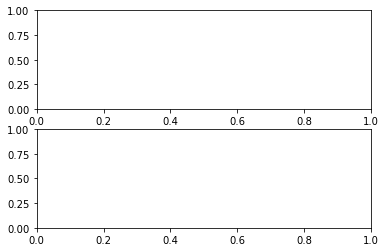

In [136]:
fig,ax = plt.subplots(2,1)

ax[0].hist(get_upper_quartiles(set_1, 623)[0])
ax[1].hist(get_upper_quartiles(set_2, 777)[0])

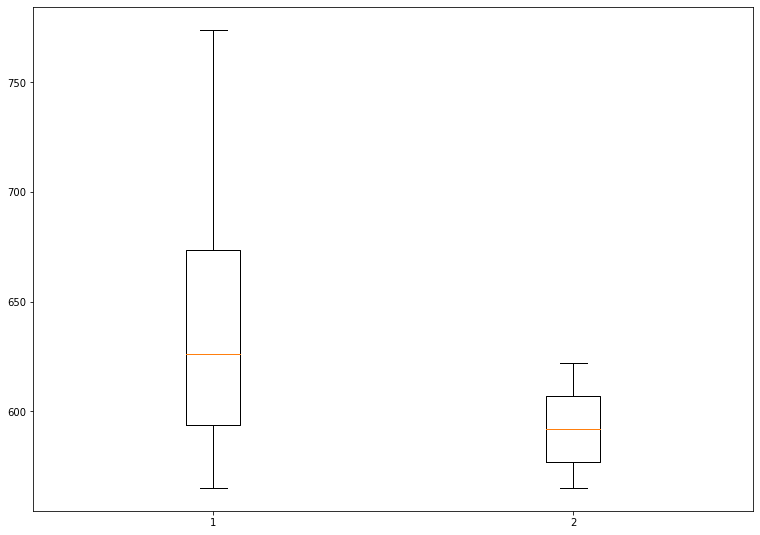

In [131]:
data = [set_2['Time(sec)'], set_1['Time(sec)']] 
  
fig,ax = plt.subplots(figsize =(10, 7)) 
  

ax = fig.add_axes([0, 0, 1, 1]) 

bp = ax.boxplot(data) 
  
# show plot 
plt.show() 